## INTROTONEURALNETWORKS/3 INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 2 EXERCISE ANSWERS ##
#### Exercise ####
#### Please refer to module 2 of IntroToNeuralNetworks - IntroToTensorflow for Tasks 1-7
#### Task 1 
##### Load the libraries that are used in this module.
#### Result:


In [1]:
# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns
# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


#### Task 2
##### Define the data directory.
#### Result:


In [2]:
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)


/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets
/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets/data


#### Task 3
##### Load the dataset `bank_marketing.csv` and save it to `bank_marketing`.
##### Print the first few rows of `bank_marketing`.
#### Result:


In [3]:
bank_marketing = pd.read_csv(data_dir + "/bank_marketing.csv")
bank_marketing.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


#### Task 4
##### Define a convenience function `ex_data_prep` to perform the data cleaning steps mentioned below.


In [ ]:
1. Replace the column `y` in the dataframe, by setting it to 1 if `y` is 'yes', otherwise set `y` to 0.
2. Perform one hot encoding on the variables with data type object (i.e `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week` and `poutcome`) except the target variable `y`
3. Drop the original variables and concatenate the dummies to original datset
4. Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`
5. Save the target variable `y` column to `y_ex` variable
6. Set the seed to 1
7. Split the data into training, test, and validation sets with 70:15:15 ratio and save respective variables to `X_train_ex`, `X_test_ex`, `X_val_ex`, `y_train_ex`, `y_test_ex`, `y_val_ex`
8. Scale the train, test and the validation datasets using Min max scaler and save as `X_train_scaled_ex`, `X_test_scaled_ex` and `X_val_scaled_ex` respectiely


#### Result:


In [6]:
def ex_data_prep(df):
    
    # Convert `y` to 0/1 values
    df['y'] = np.where(df['y'] == 'yes', 1, 0)
    
    # Perform one hot encoding
    job_dummy = pd.get_dummies(df['job'], prefix = 'job', drop_first = True)
    marital_dummy = pd.get_dummies(df['marital'], prefix = 'marital', drop_first = True)
    education_dummy = pd.get_dummies(df['education'], prefix = 'education', drop_first = True)
    default_dummy = pd.get_dummies(df['default'], prefix = 'default', drop_first = True)
    housing_dummy = pd.get_dummies(df['housing'], prefix = 'housing', drop_first = True)
    loan_dummy = pd.get_dummies(df['loan'], prefix = 'loan', drop_first = True)
    contact_dummy = pd.get_dummies(df['contact'], prefix = 'contact', drop_first = True)
    month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first = True)
    day_of_week_dummy = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week', drop_first = True)
    poutcome_dummy = pd.get_dummies(df['poutcome'], prefix = 'poutcome', drop_first = True)
    
    # Drop the original variables 
    df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                    'poutcome'], axis = 1, inplace = True)
    
    #Concatenate the dummies to original dataset
    df = pd.concat([df,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy
                            ,contact_dummy,month_dummy,day_of_week_dummy,poutcome_dummy], axis=1)
    
    # Separate predictors from target variable.
    X_ex = df.drop(['y'], axis=1)
    y_ex = df['y']
    
    # Set the seed to 1.
    np.random.seed(1)
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex.values,
                                                    y_ex,
                                                    test_size = .3,
                                                    random_state = 1)
    # Then split the test data into two halves: test and validation. 
    X_test_ex, X_val_ex, y_test_ex, y_val_ex = train_test_split(X_test_ex,
                                                y_test_ex,
                                                test_size = .5,
                                                random_state = 1)
    print("Train shape:", X_train_ex.shape, "Test shape:", X_test_ex.shape, "Val shape:", X_val_ex.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled_ex = min_max_scaler.fit_transform(X_train_ex)
    X_test_scaled_ex = min_max_scaler.transform(X_test_ex)
    X_val_scaled_ex = min_max_scaler.transform(X_val_ex)
    
    return X_train_scaled_ex, X_test_scaled_ex, X_val_scaled_ex, y_train_ex, y_test_ex, y_val_ex
  
X_train_scaled_ex, X_test_scaled_ex, X_val_scaled_ex, y_train_ex, y_test_ex, y_val_ex = ex_data_prep(bank_marketing)


Train shape: (28831, 52) Test shape: (6178, 52) Val shape: (6179, 52)


In [12]:
nsjkdvndsjkvdnsfjk = 1

In [13]:
nsjkdvndsjkvdnsfjk

1

#### Task 5
##### Initialize a simple sequential neural network model with 32 neurons for the 1st hidden layer, 20 neurons for the second layer, and appropriate input and output layers. Name the model `model_ex`.
##### Compile the model using the "adam" optimizer and "binary_crossentropy" loss, and use "accuracy" as a metric.
##### Fit the model using train and validation sets with 200 epochs, and assign it to `model_res_ex` variable.
#### Result:


In [7]:
# Let's set the seed so that we can reproduce the results.
tf.random.set_seed(1)


## Set up model.


In [8]:
model_ex = Sequential([
  Dense(32,                                         #<- number of neurons for 1st hidden layer
        input_shape = (X_train_scaled_ex.shape[1], )), #<- input layer shape: `(num_features, )`
  Dense(20,                                         #<- add 2nd hidden layer with 20 neurons
        activation = 'relu'), #<- set activation function for hidden layer
  Dense(1,                    #<- add output layer with single neuron 
       activation = 'sigmoid')#<- activation function for output layer       
])
# Compile the model.
model_ex.compile(optimizer = "adam",
                 loss = "binary_crossentropy",
                 metrics = ["accuracy"])
                 
# Fitting the model
model_res_ex = model_ex.fit(X_train_scaled_ex, y_train_ex,                 #<- train data and labels
                      validation_data = (X_val_scaled_ex, y_val_ex),       #<- pass validation data
                      epochs = 200)                                        #<- specify number of epochs
    


Epoch 1/200
901/901 [==============================] - 1s 817us/step - loss: 0.2831 - accuracy: 0.8908 - val_loss: 0.2441 - val_accuracy: 0.8995
Epoch 2/200
901/901 [==============================] - 1s 725us/step - loss: 0.2189 - accuracy: 0.9076 - val_loss: 0.2069 - val_accuracy: 0.9116
Epoch 3/200
901/901 [==============================] - 1s 664us/step - loss: 0.2014 - accuracy: 0.9115 - val_loss: 0.2006 - val_accuracy: 0.9071
Epoch 4/200
901/901 [==============================] - 1s 645us/step - loss: 0.1929 - accuracy: 0.9105 - val_loss: 0.1959 - val_accuracy: 0.9084
Epoch 5/200
901/901 [==============================] - 1s 654us/step - loss: 0.1892 - accuracy: 0.9124 - val_loss: 0.1922 - val_accuracy: 0.9086
Epoch 6/200
901/901 [==============================] - 1s 638us/step - loss: 0.1874 - accuracy: 0.9122 - val_loss: 0.1919 - val_accuracy: 0.9066
Epoch 7/200
901/901 [==============================] - 1s 649us/step - loss: 0.1856 - accuracy: 0.9131 - val_loss: 0.1947 - val_ac

901/901 [==============================] - 1s 629us/step - loss: 0.1625 - accuracy: 0.9251 - val_loss: 0.1959 - val_accuracy: 0.9112
Epoch 58/200
901/901 [==============================] - 1s 646us/step - loss: 0.1626 - accuracy: 0.9241 - val_loss: 0.1932 - val_accuracy: 0.9110
Epoch 59/200
901/901 [==============================] - 1s 660us/step - loss: 0.1618 - accuracy: 0.9260 - val_loss: 0.1972 - val_accuracy: 0.9097
Epoch 60/200
901/901 [==============================] - 1s 613us/step - loss: 0.1620 - accuracy: 0.9264 - val_loss: 0.1940 - val_accuracy: 0.9110
Epoch 61/200
901/901 [==============================] - 1s 633us/step - loss: 0.1621 - accuracy: 0.9264 - val_loss: 0.1960 - val_accuracy: 0.9095
Epoch 62/200
901/901 [==============================] - 1s 636us/step - loss: 0.1615 - accuracy: 0.9259 - val_loss: 0.1999 - val_accuracy: 0.9058
Epoch 63/200
901/901 [==============================] - 1s 640us/step - loss: 0.1614 - accuracy: 0.9264 - val_loss: 0.2004 - val_accuracy

901/901 [==============================] - 1s 791us/step - loss: 0.1562 - accuracy: 0.9291 - val_loss: 0.1991 - val_accuracy: 0.9078
Epoch 114/200
901/901 [==============================] - 1s 811us/step - loss: 0.1553 - accuracy: 0.9288 - val_loss: 0.2012 - val_accuracy: 0.9076
Epoch 115/200
901/901 [==============================] - 1s 805us/step - loss: 0.1558 - accuracy: 0.9304 - val_loss: 0.2063 - val_accuracy: 0.9092
Epoch 116/200
901/901 [==============================] - 1s 817us/step - loss: 0.1557 - accuracy: 0.9302 - val_loss: 0.2011 - val_accuracy: 0.9089
Epoch 117/200
901/901 [==============================] - 1s 873us/step - loss: 0.1556 - accuracy: 0.9298 - val_loss: 0.2035 - val_accuracy: 0.9063
Epoch 118/200
901/901 [==============================] - 1s 917us/step - loss: 0.1557 - accuracy: 0.9293 - val_loss: 0.2049 - val_accuracy: 0.9099
Epoch 119/200
901/901 [==============================] - 1s 901us/step - loss: 0.1557 - accuracy: 0.9302 - val_loss: 0.2001 - val_ac

Epoch 169/200
901/901 [==============================] - 1s 866us/step - loss: 0.1533 - accuracy: 0.9309 - val_loss: 0.2079 - val_accuracy: 0.9035
Epoch 170/200
901/901 [==============================] - 1s 794us/step - loss: 0.1526 - accuracy: 0.9316 - val_loss: 0.2082 - val_accuracy: 0.9053
Epoch 171/200
901/901 [==============================] - 1s 795us/step - loss: 0.1529 - accuracy: 0.9306 - val_loss: 0.2090 - val_accuracy: 0.9082
Epoch 172/200
901/901 [==============================] - 1s 823us/step - loss: 0.1532 - accuracy: 0.9318 - val_loss: 0.2082 - val_accuracy: 0.9048
Epoch 173/200
901/901 [==============================] - 1s 796us/step - loss: 0.1530 - accuracy: 0.9310 - val_loss: 0.2075 - val_accuracy: 0.9047
Epoch 174/200
901/901 [==============================] - 1s 919us/step - loss: 0.1530 - accuracy: 0.9304 - val_loss: 0.2079 - val_accuracy: 0.9022
Epoch 175/200
901/901 [==============================] - 1s 909us/step - loss: 0.1528 - accuracy: 0.9315 - val_loss: 0

#### Task 6
##### Plot accuracy and loss curves for `model_res_ex`. 
##### You can access them by checking the `model_res_ex.history` dictionary.
#### Result:


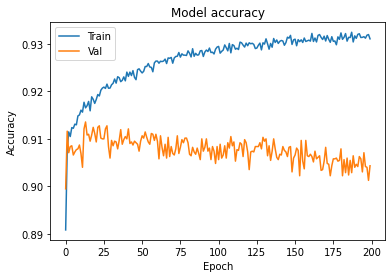

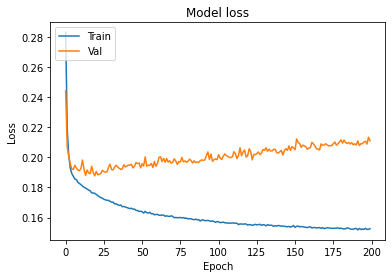

In [9]:
# Plot training & validation accuracy values
plt.plot(model_res_ex.history['accuracy'])    #<- accuracy scores
plt.plot(model_res_ex.history['val_accuracy'])#<- get validation accuracy scores from dictionary
plt.title('Model accuracy')                   #<- adding title to the plot
plt.ylabel('Accuracy')                        #<- naming the y-axis 
plt.xlabel('Epoch')                           #<- naming the x-axis
plt.legend(['Train', 'Val'], loc='upper left') #<- adding a legend
plt.show()                                    #<- displaying the plot
# Plot training & validation loss values
plt.plot(model_res_ex.history['loss'])          #<- loss values
plt.plot(model_res_ex.history['val_loss'])      #<- get validation loss scores from dictionary
plt.title('Model loss')                         #<- adding title to the plot
plt.ylabel('Loss')                              #<- naming the y-axis
plt.xlabel('Epoch')                             #<- naming the x-axis
plt.legend(['Train', 'Val'], loc='upper left')  #<- adding a legend
plt.show()                                      #<- displaying the plot


#### Task 7
##### Evaluate the model on the test data. Save loss as `loss_ex` and accuracy as `accuracy_ex`. Print the loss and accuracy values.
##### Predict the labels on test data for the model and save as `y_pred_ex`. 
##### Check how the values look.
#### Result:


In [10]:
loss_ex, accuracy_ex = model_ex.evaluate(x = X_test_scaled_ex, y = y_test_ex)
print("Loss: {0:6.3f}, Accuracy: {1:6.3f}".format(loss_ex, accuracy_ex))
y_pred_ex = (model_ex.predict(X_test_scaled_ex)> 0.5).astype("int32")
print(y_pred_ex)


194/194 [==============================] - 0s 456us/step - loss: 0.2086 - accuracy: 0.9017
Loss:  0.209, Accuracy:  0.902
194/194 [==============================] - 0s 400us/step
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
